# CH. 8 - Market Basket Analysis
## Activities

#### Activity 8.01: Load and Prep Full Online Retail Data

In [1]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

In [2]:
online = pandas.read_excel(
    io="~/Desktop/Online Retail.xlsx", 
    sheet_name="Online Retail", 
    header=0
)

In [3]:
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

In [4]:
online1 = (
    online
    .loc[online["Quantity"] > 0]
    .loc[online['IsCPresent'] != 1]
    .loc[:, ["InvoiceNo", "Description"]]
    .dropna()
)

In [5]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    tmp_items = tmp_df.Description.tolist()
    invoice_item_list.append(tmp_items)

In [6]:
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)

In [7]:
online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

In [8]:
## COL in different order
online_encoder_df.loc[
    20125:20135, 
    online_encoder_df.columns.tolist()[100:110]
]

,6 CHOCOLATE LOVE HEART T-LIGHTS,6 EGG HOUSE PAINTED WOOD,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN
20125,False,False,False,True,False,False,False,False,False,False
20126,False,False,False,False,True,False,False,False,False,False
20127,False,False,False,False,False,False,False,False,False,False
20128,False,False,False,False,False,False,False,False,False,False
20129,True,False,False,False,False,False,False,False,False,False
20130,True,False,False,False,False,False,False,False,False,False
20131,False,False,False,False,False,False,False,False,False,False
20132,False,False,False,False,False,False,False,False,False,False
20133,False,False,False,False,False,False,False,False,False,False
20134,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Activity 8.01 Unit Test

def unittest_activity_8_01(df):
    df_shape = df.shape
    assert df_shape == (20136, 4077), "Dimension mismatch"
    
    unique_vals = list(set(df.nunique().values.tolist()))[0]
    assert unique_vals == 2, "Too many unique values"

unittest_activity_8_01(df=online_encoder_df)

#### Activity 8.02: Apriori on the Complete Online Retail Data Set

In [16]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.013359,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.015793,(10 COLOUR SPACEBOY PEN)
2,0.012465,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.017630,(12 PENCIL SMALL TUBE WOODLAND)
4,0.017978,(12 PENCILS SMALL TUBE RED RETROSPOT)
5,0.017630,(12 PENCILS SMALL TUBE SKULL)
6,0.013309,(12 PENCILS TALL TUBE RED RETROSPOT)


In [17]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'ANTIQUE SILVER TEA GLASS ETCHED', 'REGENCY CAKESTAND 3 TIER'}
    )
]

,support,itemsets


In [18]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

In [19]:
## item set order different

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
836,0.020759,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
887,0.020362,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",2
923,0.020610,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",2
1105,0.020560,"(JUMBO BAG PINK POLKADOT, JUMBO BAG BAROQUE B...",2
1114,0.020908,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG...",2
1116,0.020957,"(JUMBO STORAGE BAG SUKI, JUMBO BAG BAROQUE BL...",2
1129,0.020560,"(JUMBO BAG RED RETROSPOT, JUMBO BAG ALPHABET)",2
1137,0.020163,"(JUMBO BAG APPLES, JUMBO BAG PEARS)",2
1203,0.020709,"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",2
1218,0.020560,"(JUMBO STORAGE BAG SKULLS, JUMBO BAG RED RETRO...",2


Text(0.5, 1.0, 'Support')

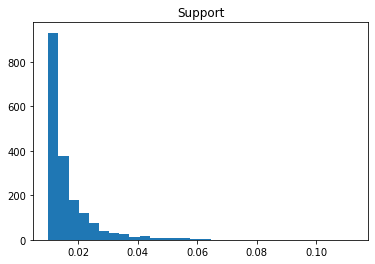

In [20]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support")

In [ ]:
# Activity 8.02 Unit Test

def unittest_activity_8_02(df):
    df_shape = df.shape
    assert df_shape == (1854, 3), "Dimension mismatch"
    
    df_filt_shape = df[(df['length'] == 2) 
                       & (df['support'] >= 0.02) 
                       & (df['support'] < 0.021)].shape
    assert df_filt_shape == (17, 3), "Filtered dimension mismatch"

unittest_activity_8_02(df=mod_colnames_minsupport)

#### Activity 8.03: Find the Association Rules on the Complete Online Retail Data Set

In [28]:
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021255,0.048669,0.013756,0.647196,13.297902,0.012722,2.696488
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.021255,0.052195,0.014501,0.682243,13.071023,0.013392,2.982798
2,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.022100,0.048669,0.013558,0.613483,12.605201,0.012482,2.461292
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048669,0.052195,0.031784,0.653061,12.511932,0.029244,2.731908
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052195,0.048669,0.031784,0.608944,12.511932,0.029244,2.432722
5,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED ),0.028308,0.052195,0.018524,0.654386,12.537313,0.017047,2.742380
6,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED ),0.022100,0.052195,0.014998,0.678652,13.002217,0.013845,2.949463


In [29]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 498


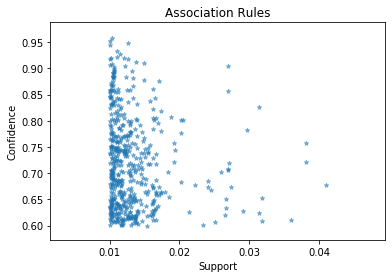

In [30]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

Text(0.5, 1.0, 'Lift')

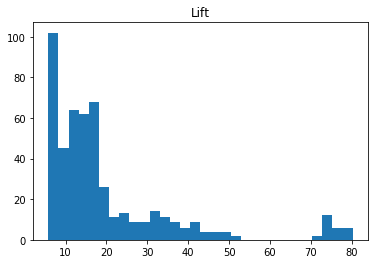

In [31]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")

Text(0.5, 1.0, 'Leverage')

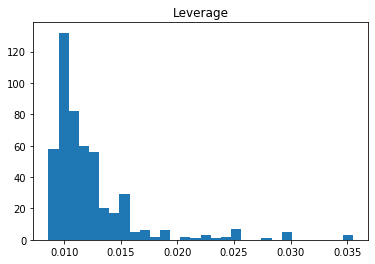

In [32]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage")

Text(0.5, 1.0, 'Conviction')

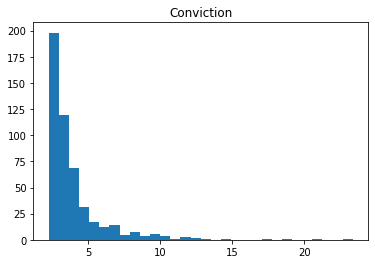

In [33]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.title("Conviction")

In [ ]:
# Activity 8.03 Unit Test

def unittest_activity_8_03(df):
    df_shape = df.shape
    assert df_shape == (498, 9), "Dimension mismatch"
    
    vals = df[numpy.isfinite(df['conviction'])].conviction.values
    vmin = round(numpy.min(vals), 2)
    vmax = round(numpy.max(vals), 2)
    assert (vmin, vmax) == (2.25, 23.37), "Conviction incorrect"

unittest_activity_8_03(df=rules)